<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/Price_Momentum_Strategy_Only_Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance pandas matoplotlib

ERROR: Could not find a version that satisfies the requirement matoplotlib (from versions: none)
ERROR: No matching distribution found for matoplotlib


In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [22]:

# Define the stock symbols
symbols = ["GME", "AMC"]

# Define the date range
start_date = "2020-09-29"
end_date = "2021-09-29"

# Fetch historical data for all symbols
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


Actual Results For This Time Period

In [23]:
actual_returns = data["Close"].iloc[-1]/data["Close"].iloc[0] - 1

print("Actual Returns:")

for symbol, return_value in actual_returns.items():

  print(f"{symbol}: {return_value:.2%}")



Actual Returns:
AMC: 661.11%
GME: 1625.60%


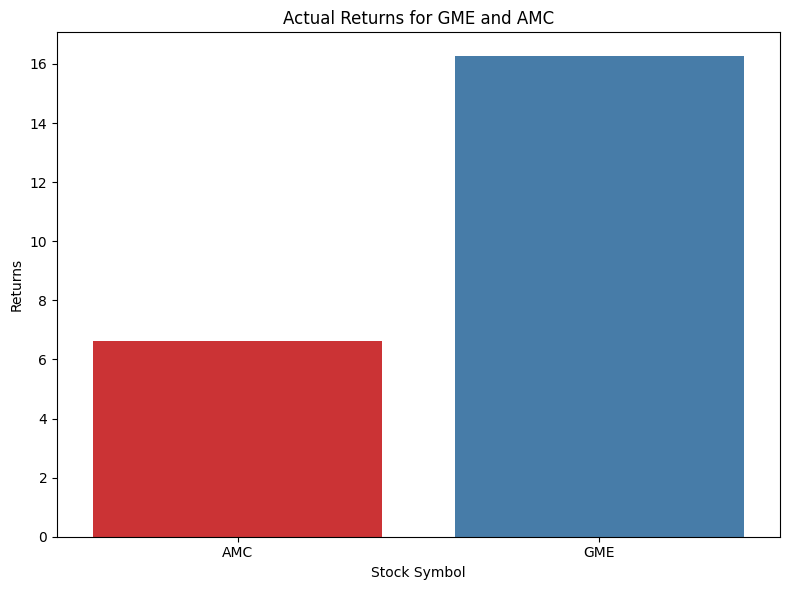

In [24]:
# Create a bar plot for actual returns
plt.figure(figsize=(8, 6))
sns.barplot(x=actual_returns.index, y=actual_returns.values, palette='Set1')
plt.title('Actual Returns for GME and AMC')
plt.ylabel('Returns')
plt.xlabel('Stock Symbol')
plt.xticks(ticks=np.arange(len(actual_returns)), labels=actual_returns.index)
plt.tight_layout()
plt.show()

In [25]:
#These are the actual results for GMC and AMC for the year starting in 2020 till 2021.

#Our goal is to comparing the real results with different strategies and to see if we can beat it.

In [26]:
data.head()

Adj Close         Close          High           Low          Open  \
                 AMC     GME   AMC     GME   AMC     GME   AMC     GME   AMC   
Date                                                                           
2020-09-29      4.86  2.5875  4.86  2.5875  4.94  2.6625  4.75  2.4825  4.88   
2020-09-30      4.71  2.5500  4.71  2.5500  4.95  2.6900  4.70  2.5150  4.80   
2020-10-01      4.65  2.4425  4.65  2.4425  4.80  2.5625  4.63  2.4225  4.78   
2020-10-02      4.65  2.3475  4.65  2.3475  4.66  2.4450  4.42  2.3250  4.48   
2020-10-05      4.13  2.3650  4.13  2.3650  4.36  2.3975  4.05  2.3125  4.30   

                     Volume            
               GME      AMC       GME  
Date                                   
2020-09-29  2.5000  2520000  20950400  
2020-09-30  2.5625  2515400  24316000  
2020-10-01  2.5225  3223800  18216400  
2020-10-02  2.3450  3576000  17362000  
2020-10-05  2.3600  9468800  11220000

In [27]:
data.shape

(252, 12)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-09-29 to 2021-09-28
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, AMC)  252 non-null    float64
 1   (Adj Close, GME)  252 non-null    float64
 2   (Close, AMC)      252 non-null    float64
 3   (Close, GME)      252 non-null    float64
 4   (High, AMC)       252 non-null    float64
 5   (High, GME)       252 non-null    float64
 6   (Low, AMC)        252 non-null    float64
 7   (Low, GME)        252 non-null    float64
 8   (Open, AMC)       252 non-null    float64
 9   (Open, GME)       252 non-null    float64
 10  (Volume, AMC)     252 non-null    int64  
 11  (Volume, GME)     252 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 25.6 KB


In [29]:
data.describe()

Adj Close                   Close                    High              \
              AMC         GME         AMC         GME         AMC         GME   
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    19.291786   31.424702   19.291786   31.424702   20.611191   34.025496   
std     18.578160   21.780348   18.578160   21.780348   19.879953   24.091653   
min      1.980000    2.282500    1.980000    2.282500    2.030000    2.390000   
25%      4.025000    4.572500    4.025000    4.572500    4.180000    4.860625   
50%      9.875000   39.728750    9.875000   39.728750   10.475000   41.201250   
75%     36.990002   47.909374   36.990002   47.909374   38.867499   50.583126   
max     62.549999   86.877502   62.549999   86.877502   72.620003  120.750000   

              Low                    Open                    Volume  \
              AMC         GME         AMC         GME           AMC   
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean    18.118333   29.417024   19.290476   31.711131  1.087636e+08   
std     17.465268   20.389361   18.456260   22.244915  1.459106e+08   
min      1.910000    2.275000    1.990000    2.307500  2.515400e+06   
25%      3.830000    4.326250    4.070000    4.599375  2.986342e+07   
50%      9.570000   37.881250   10.070000   39.762501  6.129270e+07   
75%     35.039999   45.931876   37.437500   48.561250  1.225554e+08   
max     56.849998   72.877502   61.340000   94.927498  1.222342e+09   

                     
                GME  
count  2.520000e+02  
mean   6.733258e+07  
std    1.142053e+08  
min    3.781600e+06  
25%    1.519870e+07  
50%    2.838660e+07  
75%    5.957050e+07  
max    7.886316e+08

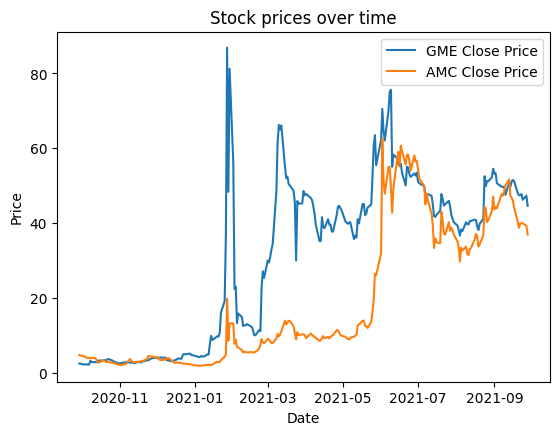

In [30]:
#Visualizing

plt.figure(figsize = (14,10))

#Line plots of stock prices over time. Note: this is actual price over that time period, which has been downloaded from Yahoo Finance

plt.subplot(2,2,1)
for symbol in symbols:
  plt.plot(data['Close'][symbol], label=f'{symbol} Close Price')

plt.title("Stock prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [31]:
data.head()

Adj Close         Close          High           Low          Open  \
                 AMC     GME   AMC     GME   AMC     GME   AMC     GME   AMC   
Date                                                                           
2020-09-29      4.86  2.5875  4.86  2.5875  4.94  2.6625  4.75  2.4825  4.88   
2020-09-30      4.71  2.5500  4.71  2.5500  4.95  2.6900  4.70  2.5150  4.80   
2020-10-01      4.65  2.4425  4.65  2.4425  4.80  2.5625  4.63  2.4225  4.78   
2020-10-02      4.65  2.3475  4.65  2.3475  4.66  2.4450  4.42  2.3250  4.48   
2020-10-05      4.13  2.3650  4.13  2.3650  4.36  2.3975  4.05  2.3125  4.30   

                     Volume            
               GME      AMC       GME  
Date                                   
2020-09-29  2.5000  2520000  20950400  
2020-09-30  2.5625  2515400  24316000  
2020-10-01  2.5225  3223800  18216400  
2020-10-02  2.3450  3576000  17362000  
2020-10-05  2.3600  9468800  11220000

Price Momentum Strategy:

The price momentum strategy is a type of trading strategy that capitalizes on the observed tendency of assets to continue moving in the same direction as their recent price trends. In other words, the strategy assumes that stocks that have recently shown strong positive price movements will continue to rise, and stocks that have recently exhibited weak price movements will continue to decline.

Step 1: Fetching historical data for these two stocks has been completed

Step 2: Calculating Momentum: The goal is to calculate the price momentum as the percentage change in the stock;s closing price over specified period (e.g.: 3 months):

In [44]:
momentum_period = 90
buy_threshold = 0.05
sell_threshold = -0.05

In [45]:
# Calculate price momentum
for symbol in symbols:
    data['Momentum', symbol] = data['Close', symbol].pct_change(momentum_period)

In [49]:
# Generate signals
for symbol in symbols:
    data['Signal', symbol] = 0
    data.loc[data['Momentum', symbol] > buy_threshold, ('Signal', symbol)] = 1
    data.loc[data['Momentum', symbol] < sell_threshold, ('Signal', symbol)] = -1



In [50]:
# Implement Price Momentum Trading logic
capital = 100000
position = {symbol: 0 for symbol in symbols}
shares_to_buy = 0

for i in range(1, len(data)):
    for symbol in symbols:
        momentum_signal = data['Signal', symbol][i]
        close_price = data['Close', symbol][i]

        if momentum_signal == 1 and position[symbol] != 1:
            position[symbol] = 1
            shares_to_buy = capital // close_price
            capital -= shares_to_buy * close_price

        elif momentum_signal == -1 and position[symbol] != -1:
            position[symbol] = -1
            capital += shares_to_buy * close_price

        elif momentum_signal == 0 and position[symbol] != 0:
            position[symbol] = 0
            capital += shares_to_buy * close_price

In [57]:
# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

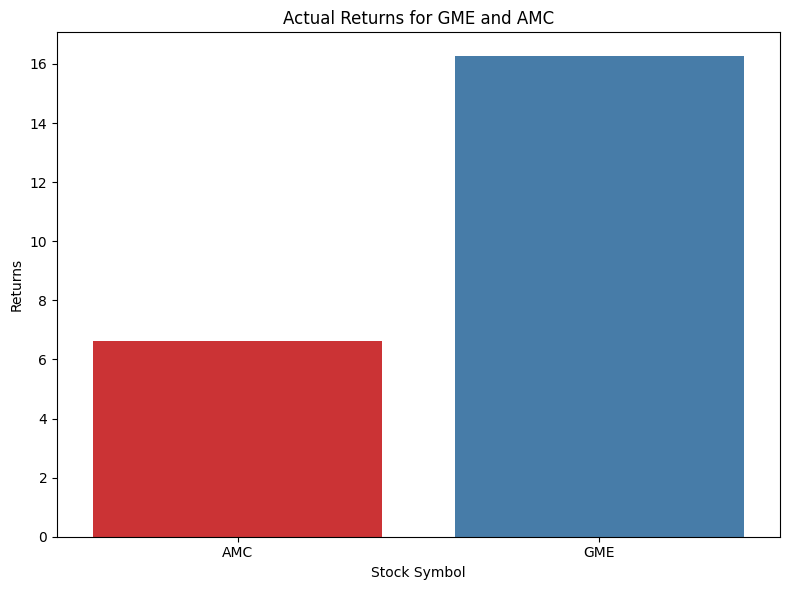

In [58]:
# Create a bar plot for actual returns
plt.figure(figsize=(8, 6))
sns.barplot(x=actual_returns.index, y=actual_returns.values, palette='Set1')
plt.title('Actual Returns for GME and AMC')
plt.ylabel('Returns')
plt.xlabel('Stock Symbol')
plt.xticks(ticks=np.arange(len(actual_returns)), labels=actual_returns.index)
plt.tight_layout()
plt.show()

GME Strategy Final Return: 296.48%
AMC Strategy Final Return: 498.54%


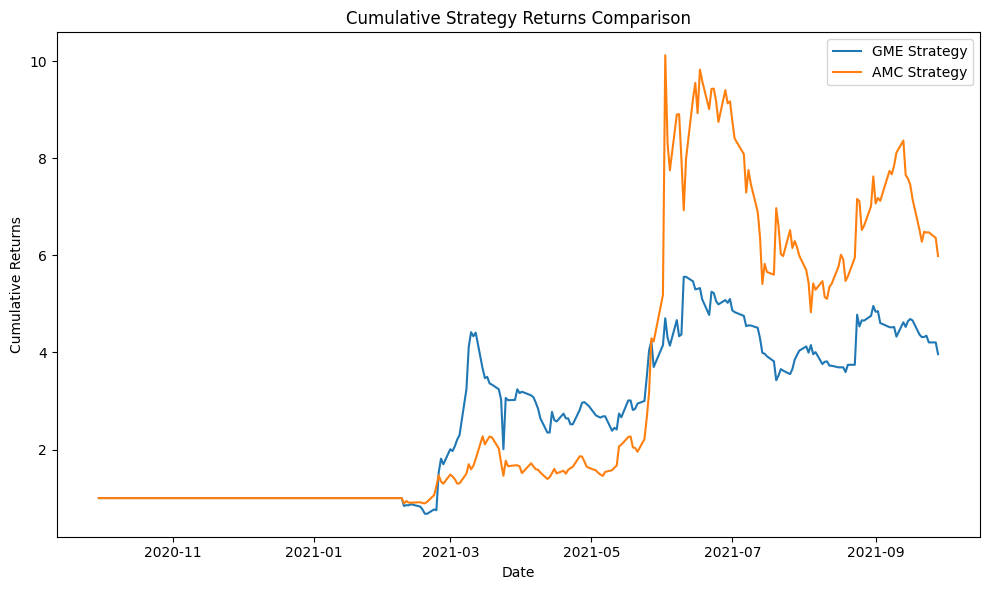

In [60]:
# Create separate line plots for strategy returns
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(data.index, data['Cumulative_Strategy_Returns', symbol], label=f'{symbol} Strategy')
    strategy_final_return = data['Cumulative_Strategy_Returns', symbol][-1] - 1  # Calculate final return
    print(f'{symbol} Strategy Final Return: {strategy_final_return:.2%}')  # Print final return as percentage

plt.title('Cumulative Strategy Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()

Comparing price momentum to actual results via visualization

GME Strategy Final Return: 296.48%
AMC Strategy Final Return: 498.54%


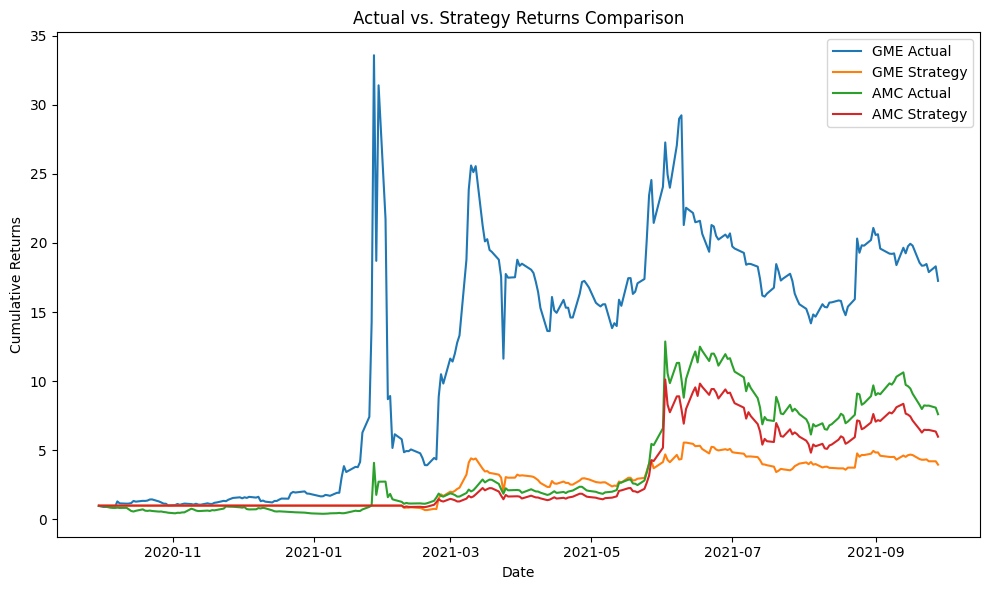

In [62]:
# Calculate actual returns
for symbol in symbols:
    data['Actual_Returns', symbol] = data['Close', symbol].pct_change()
    data['Cumulative_Actual_Returns', symbol] = (1 + data['Actual_Returns', symbol]).cumprod()

# Create line plots for actual returns and strategy returns comparison
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(data.index, data['Cumulative_Actual_Returns', symbol], label=f'{symbol} Actual')
    plt.plot(data.index, data['Cumulative_Strategy_Returns', symbol], label=f'{symbol} Strategy')
    strategy_final_return = data['Cumulative_Strategy_Returns', symbol][-1] - 1  # Calculate final return
    print(f'{symbol} Strategy Final Return: {strategy_final_return:.2%}')  # Print final return as percentage

plt.title('Actual vs. Strategy Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()
